In [93]:
#scale the data
#initialize centroids
#label each data point
#plot the centroids
#repeat 3-5 until centroids stops changing

In [94]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from IPython.display import clear_output
#import in neede libraries

In [95]:
import numpy as np

import pandas as pd

import CalculatedFieldSubroutines as cfs

from pandasgui import show

import warnings
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [96]:
best_pose = pd.read_csv('/home/jle_linux//Desktop/TDMprivate/data/2f2939cc-f228-11ee-bb28-fb353e7798cd/_apollo_sensor_gnss_best_pose/')

In [97]:
best_pose = best_pose.sort_values( 'time' )

In [98]:
cfs.LatLonTotalStdDev(best_pose)

In [99]:
best_pose.head()
#checked to see the beginning of the data and its variables

,heightMsl,groupMetadataID,latitudeStdDev,longitude,solType,extendedSolutionStatus,time,heightStdDev,solStatus,latitude,longitudeStdDev,numSatsInSolution,LatLonTotalStdDev
0,202.979063,06cbdbc0-db4d-11ee-a158-97f8443fd730,0.010338,-82.127898,NARROW_INT,33,1693494302079024174,0.021565,SOL_COMPUTED,39.329569,0.008520,14,0.013396
1,202.976077,06cbdbc0-db4d-11ee-a158-97f8443fd730,0.010329,-82.127898,NARROW_INT,33,1693494303047747084,0.021566,SOL_COMPUTED,39.329569,0.008518,14,0.013388
2,202.976105,06cbdbc0-db4d-11ee-a158-97f8443fd730,0.010346,-82.127898,NARROW_INT,33,1693494304060687314,0.021597,SOL_COMPUTED,39.329569,0.008539,14,0.013415
3,202.978510,06cbdbc0-db4d-11ee-a158-97f8443fd730,0.010317,-82.127898,NARROW_INT,33,1693494305053737259,0.021528,SOL_COMPUTED,39.329569,0.008509,14,0.013374
4,202.979463,06cbdbc0-db4d-11ee-a158-97f8443fd730,0.010343,-82.127898,NARROW_INT,33,1693494306051479383,0.021557,SOL_COMPUTED,39.329569,0.008513,14,0.013396


In [100]:
features = [ "latitude", "longitude", "latitudeStdDev", "longitudeStdDev", "numSatsInSolution", "LatLonTotalStdDev" ]
#created a selection on variables/column that I believed were important and wanted to use

In [101]:
best_pose = best_pose.dropna(subset=features)
#deleted any na or missing values, I believe that this dataset had none (would not do this again, since all data is deemed as important)

In [102]:
data = best_pose[features].copy()
#creates a copy of the original data with on the subset features and columns I wanted 

In [103]:
data
#show the data

,latitude,longitude,latitudeStdDev,longitudeStdDev,numSatsInSolution,LatLonTotalStdDev
0,39.329569,-82.127898,0.010338,0.008520,14,0.013396
1,39.329569,-82.127898,0.010329,0.008518,14,0.013388
2,39.329569,-82.127898,0.010346,0.008539,14,0.013415
3,39.329569,-82.127898,0.010317,0.008509,14,0.013374
4,39.329569,-82.127898,0.010343,0.008513,14,0.013396
...,...,...,...,...,...,...
1751,39.334020,-82.132185,0.012971,0.012548,13,0.018047
1752,39.333891,-82.132086,0.012043,0.010646,13,0.016074
1753,39.333760,-82.131997,0.011846,0.010292,13,0.015693
1754,39.333631,-82.131915,0.011899,0.010357,13,0.015775


In [104]:
data = ((data - data.min())/(data.max()-data.min())) * 9 + 1
#minimize the data to be able to ensure no column is prioritized over another.

In [105]:
data.describe()
#you can see that my minimum is now 1 and maximum is now 10

,latitude,longitude,latitudeStdDev,longitudeStdDev,numSatsInSolution,LatLonTotalStdDev
count,1756.000000,1756.000000,1756.000000,1756.000000,1756.000000,1756.000000
mean,4.972540,4.991859,1.091792,1.155680,8.220794,1.115470
std,2.931015,2.942645,0.396620,0.558958,1.331882,0.447140
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2.345338,2.837974,1.001592,1.003484,7.428571,1.002216
50%,4.257716,3.744505,1.003788,1.007438,8.714286,1.004942
75%,8.096456,8.182134,1.007851,1.013347,9.357143,1.010316
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000


In [106]:
data.head()

,latitude,longitude,latitudeStdDev,longitudeStdDev,numSatsInSolution,LatLonTotalStdDev
0,2.380293,4.443416,1.000152,1.000042,10.0,1.000024
1,2.380293,4.443416,1.000145,1.000039,10.0,1.000018
2,2.380291,4.443413,1.000158,1.000065,10.0,1.000036
3,2.380291,4.443418,1.000136,1.000028,10.0,1.000009
4,2.380300,4.443416,1.000156,1.000032,10.0,1.000023


In [107]:
def random_centroids(data,k):
    centroids = []
    for i in range(k):
        centroid = data.apply(lambda x: float(x.sample()))
        centroids.append(centroid)
    return pd.concat(centroids, axis=1)
#a function that will take in the number of clusters we want with our data
#initialize a list called centroids for i in range k
#then add it to the list of centroids
#the number of centroids is equivalent to the number of clusters we want
#combines all of the centroids(individual pandas series) into a data frame

In [108]:
centroids = random_centroids(data,5)
#we can now run the random_centroids

/tmp/ipykernel_21022/973749533.py:4: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  centroid = data.apply(lambda x: float(x.sample()))


In [109]:
centroids

,0,1,2,3,4
latitude,2.345343,2.424224,1.487794,9.356748,4.301200
longitude,1.029038,3.033241,4.404247,2.838372,4.490142
latitudeStdDev,1.002555,1.006590,1.000234,1.002907,1.002547
longitudeStdDev,1.008796,1.064026,1.003524,1.003484,1.001083
numSatsInSolution,9.357143,8.071429,8.714286,10.000000,6.142857
LatLonTotalStdDev,1.000217,1.008246,1.008604,1.002373,1.000509


In [110]:
def get_labels(data, centroids):
    distances = centroids.apply(lambda x: np.sqrt(((data - x) ** 2).sum(axis=1)))
    return distances.idxmin(axis=1)
#label each data point 
#finds the euclidean distance between a data point and each cluster for all centroids 
#finding which cluster center is closest to that point 

In [111]:
labels = get_labels(data, centroids)

In [112]:
labels.value_counts()
#how many times each value occurs 

2    653
3    602
4    262
1    230
0      9
Name: count, dtype: int64

In [113]:
def new_centroids(data, labels, k):
    centroids = data.groupby(labels).apply(lambda x: np.exp(np.log(x).mean())).T
    return centroids
#splits the data by each cluster and then calculate a new center for each group

In [114]:
def plot_clusters(data, labels, centroids, iteration):
    pca = PCA(n_components=2)
    data_2d = pca.fit_transform(data)
    centroids_2d = pca.transform(centroids.T)
    clear_output(wait=True)
    plt.title(f'Iteration {iteration}')
    plt.scatter(x=data_2d[:,0], y=data_2d[:,1], c=labels)
    plt.scatter(x=centroids_2d[:,0], y=centroids_2d[:,1])
    plt.show()
#Using PCA to change the multidimensional values into 2-D data
#Pass in the several column data and get it converted into 2 column data
#plotting the clusters and coloring from the plotting of centroids 
#will wait and change the graph over the already completed graph 

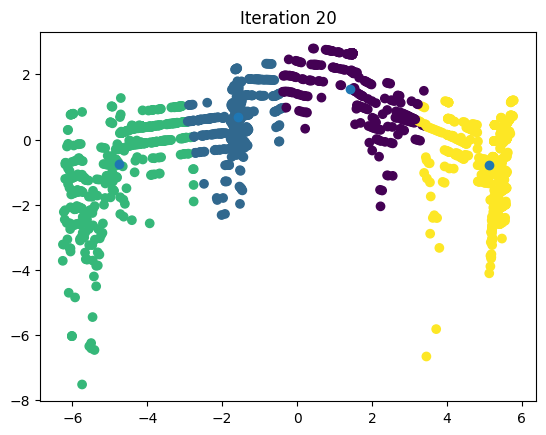

In [156]:
max_iterations = 100
centroid_count = 4

centroids = random_centroids(data, centroid_count)
old_centroids = pd.DataFrame()
iteration = 1

while iteration < max_iterations and not centroids.equals(old_centroids):
    old_centroids = centroids
    
    labels = get_labels(data, centroids)
    centroids = new_centroids(data, labels, centroid_count)
    plot_clusters(data, labels, centroids, iteration)
    iteration += 1
#when new centroids are equilavent to past centroids (indicates that it has stopped shifting)
#update the data to see which label corresponds with each cluster

In [116]:
centroids

,0,1,2,4
latitude,7.585966,1.918677,3.370918,9.269214
longitude,3.226111,8.874503,3.347678,1.400856
latitudeStdDev,1.007691,1.058346,1.007019,1.433111
longitudeStdDev,1.013704,1.106275,1.010576,1.645490
numSatsInSolution,8.810287,7.911428,8.482898,5.754219
LatLonTotalStdDev,1.010010,1.079482,1.008164,1.514457


In [117]:
labels.value_counts()

0    574
1    570
2    431
4    181
Name: count, dtype: int64

In [118]:
best_pose[labels == 0][["groupMetadataID"] + features]

,groupMetadataID,latitude,longitude,latitudeStdDev,longitudeStdDev,numSatsInSolution,LatLonTotalStdDev
862,06cbdbc0-db4d-11ee-a158-97f8443fd730,39.353243,-82.133649,0.060354,0.030936,13,0.067821
863,06cbdbc0-db4d-11ee-a158-97f8443fd730,39.353403,-82.133542,0.067256,0.032398,13,0.074652
864,06cbdbc0-db4d-11ee-a158-97f8443fd730,39.353562,-82.133431,0.070517,0.033188,13,0.077936
865,06cbdbc0-db4d-11ee-a158-97f8443fd730,39.353716,-82.133312,0.015888,0.014759,13,0.021685
866,06cbdbc0-db4d-11ee-a158-97f8443fd730,39.353865,-82.133186,0.015593,0.014792,13,0.021493
...,...,...,...,...,...,...,...
1614,06cbdbc0-db4d-11ee-a158-97f8443fd730,39.353680,-82.133408,0.012942,0.014159,12,0.019183
1615,06cbdbc0-db4d-11ee-a158-97f8443fd730,39.353531,-82.133518,0.012467,0.013073,12,0.018064
1616,06cbdbc0-db4d-11ee-a158-97f8443fd730,39.353377,-82.133625,0.012202,0.012174,13,0.017237
1617,06cbdbc0-db4d-11ee-a158-97f8443fd730,39.353220,-82.133730,0.012118,0.012220,13,0.017210


In [119]:
best_pose[labels == 5][["groupMetadataID"] + features]
#shows the data in which cluster they are in, hence there is no cluster 5

,groupMetadataID,latitude,longitude,latitudeStdDev,longitudeStdDev,numSatsInSolution,LatLonTotalStdDev


In [120]:
from sklearn.cluster import KMeans

In [121]:
kmeans = KMeans(3)
kmeans.fit(data)

KMeans(n_clusters=3)

In [122]:
pd.DataFrame(kmeans.cluster_centers_, columns=features).T

,0,1,2
latitude,4.119710,8.528487,1.974510
longitude,3.582663,2.630226,8.937829
latitudeStdDev,1.007420,1.184031,1.075622
longitudeStdDev,1.011111,1.276684,1.167997
numSatsInSolution,8.537102,8.105756,8.032093
LatLonTotalStdDev,1.008625,1.217011,1.111488


In [123]:
from sklearn.cluster import KMeans

In [124]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [125]:
c0= best_pose[labels == 0][["groupMetadataID"] + features]

<Axes: xlabel='latitude', ylabel='longitude'>

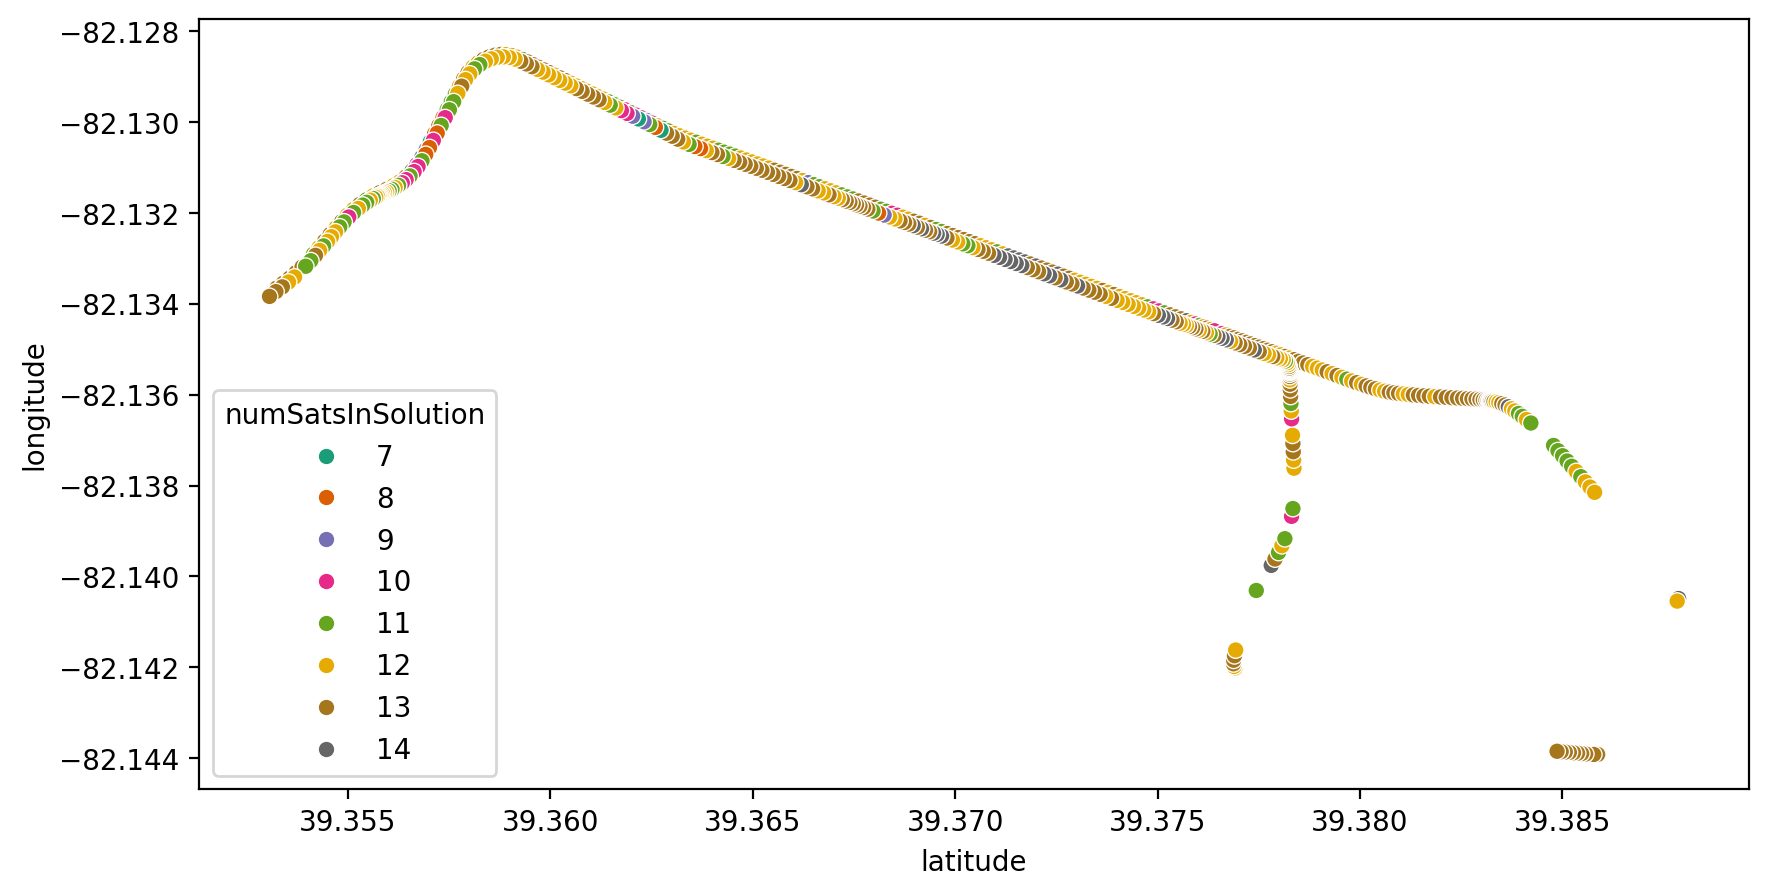

In [126]:
plt.figure(figsize=(10,5), dpi = 200)
sns.scatterplot(x = 'latitude', y = 'longitude', data = c0, hue = 'numSatsInSolution', palette = 'Dark2')

In [127]:
c1= best_pose[labels == 1][["groupMetadataID"] + features]

<Axes: xlabel='latitude', ylabel='longitude'>

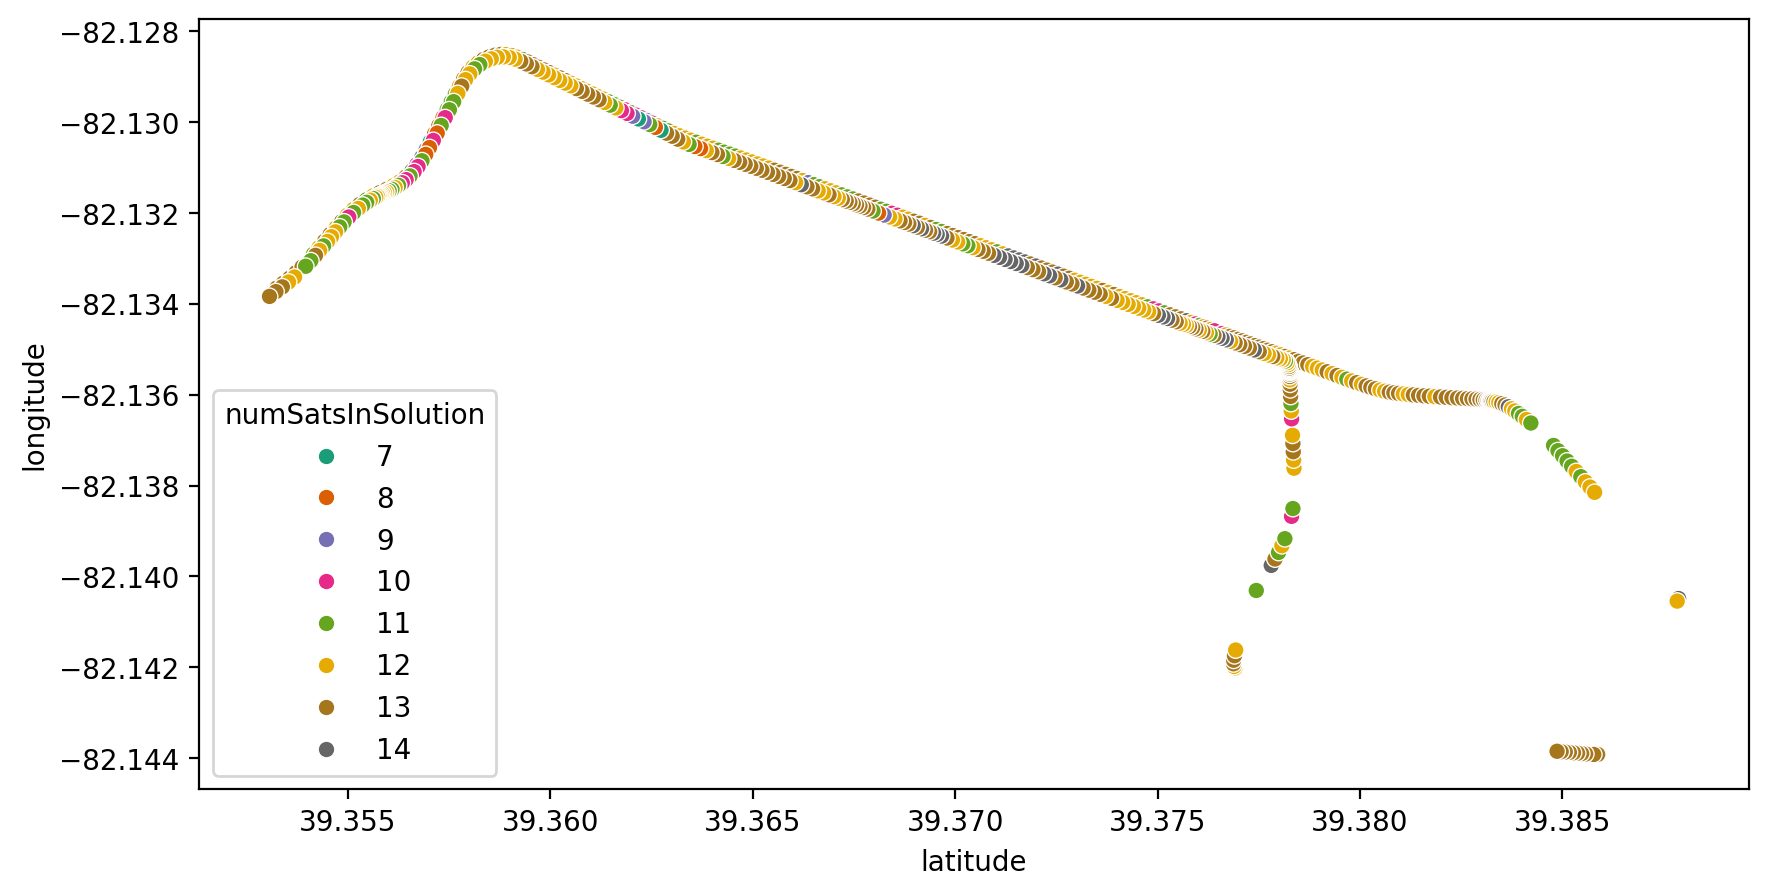

In [128]:
plt.figure(figsize=(10,5), dpi = 200)
sns.scatterplot(x = 'latitude', y = 'longitude', data = c2, hue = 'numSatsInSolution', palette = 'Dark2')

In [129]:
c2= best_pose[labels == 2][["groupMetadataID"] + features]

In [130]:
c2.head()

,groupMetadataID,latitude,longitude,latitudeStdDev,longitudeStdDev,numSatsInSolution,LatLonTotalStdDev
0,06cbdbc0-db4d-11ee-a158-97f8443fd730,39.329569,-82.127898,0.010338,0.008520,14,0.013396
1,06cbdbc0-db4d-11ee-a158-97f8443fd730,39.329569,-82.127898,0.010329,0.008518,14,0.013388
2,06cbdbc0-db4d-11ee-a158-97f8443fd730,39.329569,-82.127898,0.010346,0.008539,14,0.013415
3,06cbdbc0-db4d-11ee-a158-97f8443fd730,39.329569,-82.127898,0.010317,0.008509,14,0.013374
4,06cbdbc0-db4d-11ee-a158-97f8443fd730,39.329569,-82.127898,0.010343,0.008513,14,0.013396


<Axes: xlabel='latitude', ylabel='longitude'>

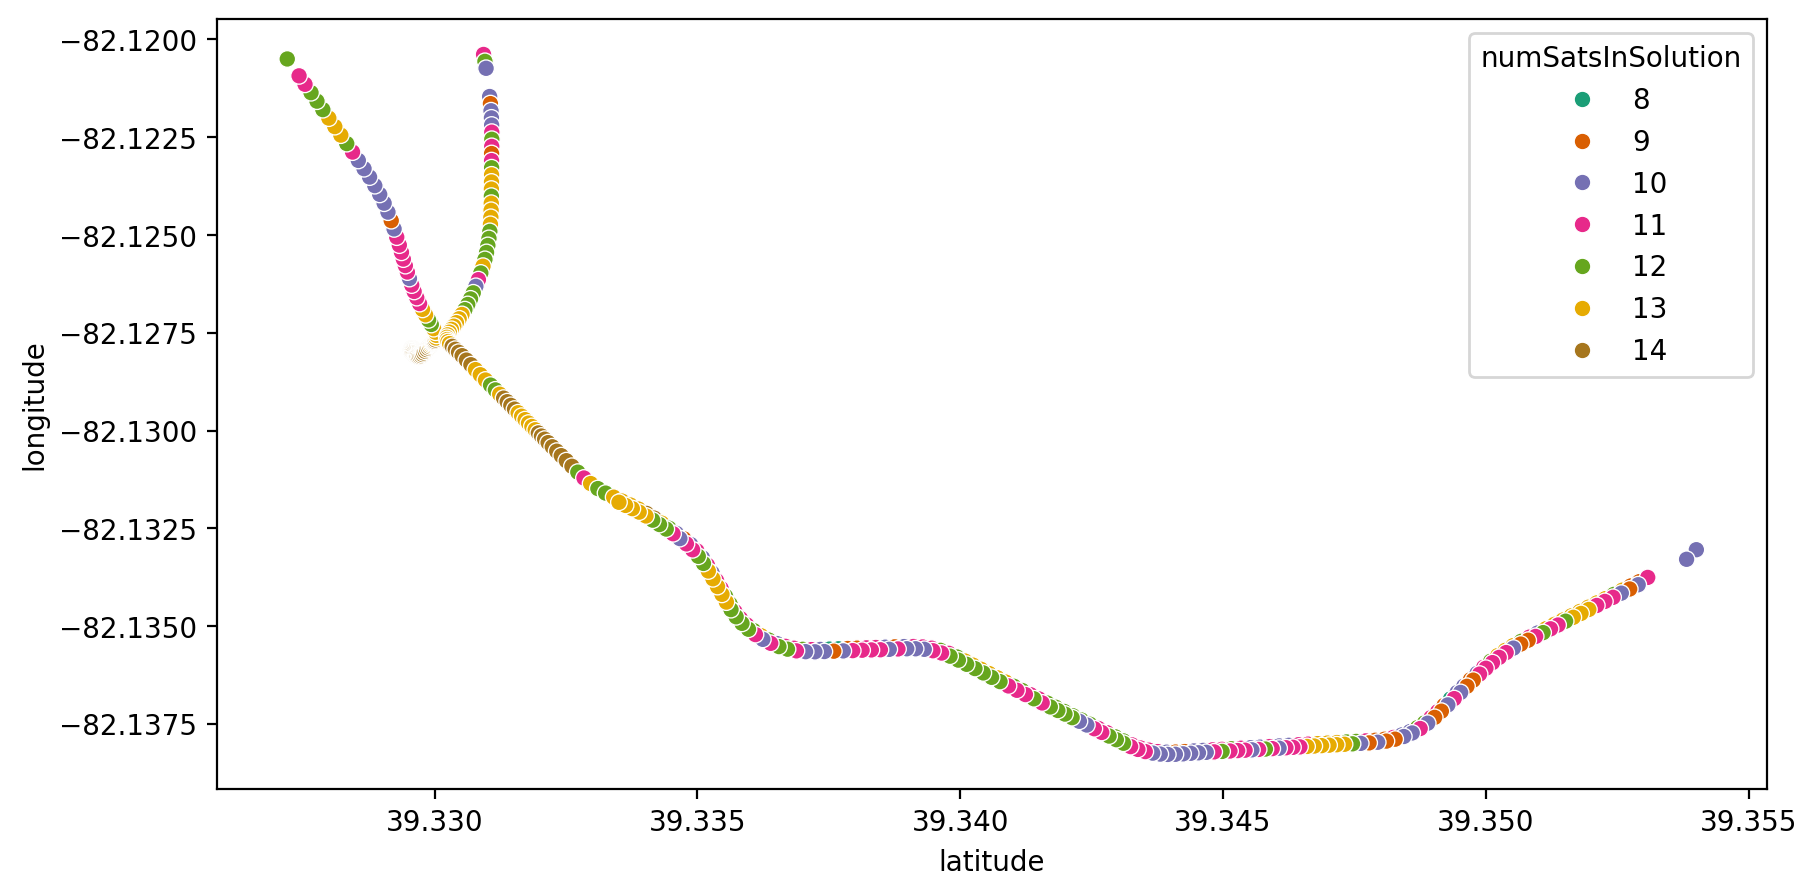

In [131]:
plt.figure(figsize=(10,5), dpi = 200)
sns.scatterplot(x = 'latitude', y = 'longitude', data = c2, hue = 'numSatsInSolution', palette = 'Dark2')

In [132]:
chasis = pd.read_csv("/home/jle_linux/Desktop/TDMprivate/data/0b72a836-f37e-11ee-bb4e-fb353e7798cd/_apollo_canbus_chassis/0b72a836-f37e-11ee-bb4e-fb353e7798cd_apollo_canbus_chassis.csv")

In [133]:
chasis.head()

,brakePercentage,groupMetadataID,drivingMode,speedMps,time,throttlePercentage,steeringPercentage,signal.turnSignal
0,0.0,0b72a836-f37e-11ee-bb4e-fb353e7798cd,COMPLETE_MANUAL,3.92,1707420476851932894,17.4,-73.104800,TURN_RIGHT
1,0.0,0b72a836-f37e-11ee-bb4e-fb353e7798cd,COMPLETE_MANUAL,3.93,1707420476883899750,17.4,-72.664055,TURN_RIGHT
2,0.0,0b72a836-f37e-11ee-bb4e-fb353e7798cd,COMPLETE_MANUAL,3.96,1707420476917887466,17.4,-72.184135,TURN_RIGHT
3,0.0,0b72a836-f37e-11ee-bb4e-fb353e7798cd,COMPLETE_MANUAL,3.99,1707420476950430948,17.4,-71.567090,TURN_RIGHT
4,0.0,0b72a836-f37e-11ee-bb4e-fb353e7798cd,COMPLETE_MANUAL,4.02,1707420476983802634,17.4,-71.087166,TURN_RIGHT


In [134]:
best_pose.head()

,heightMsl,groupMetadataID,latitudeStdDev,longitude,solType,extendedSolutionStatus,time,heightStdDev,solStatus,latitude,longitudeStdDev,numSatsInSolution,LatLonTotalStdDev
0,202.979063,06cbdbc0-db4d-11ee-a158-97f8443fd730,0.010338,-82.127898,NARROW_INT,33,1693494302079024174,0.021565,SOL_COMPUTED,39.329569,0.008520,14,0.013396
1,202.976077,06cbdbc0-db4d-11ee-a158-97f8443fd730,0.010329,-82.127898,NARROW_INT,33,1693494303047747084,0.021566,SOL_COMPUTED,39.329569,0.008518,14,0.013388
2,202.976105,06cbdbc0-db4d-11ee-a158-97f8443fd730,0.010346,-82.127898,NARROW_INT,33,1693494304060687314,0.021597,SOL_COMPUTED,39.329569,0.008539,14,0.013415
3,202.978510,06cbdbc0-db4d-11ee-a158-97f8443fd730,0.010317,-82.127898,NARROW_INT,33,1693494305053737259,0.021528,SOL_COMPUTED,39.329569,0.008509,14,0.013374
4,202.979463,06cbdbc0-db4d-11ee-a158-97f8443fd730,0.010343,-82.127898,NARROW_INT,33,1693494306051479383,0.021557,SOL_COMPUTED,39.329569,0.008513,14,0.013396


<Axes: xlabel='latitude', ylabel='longitude'>

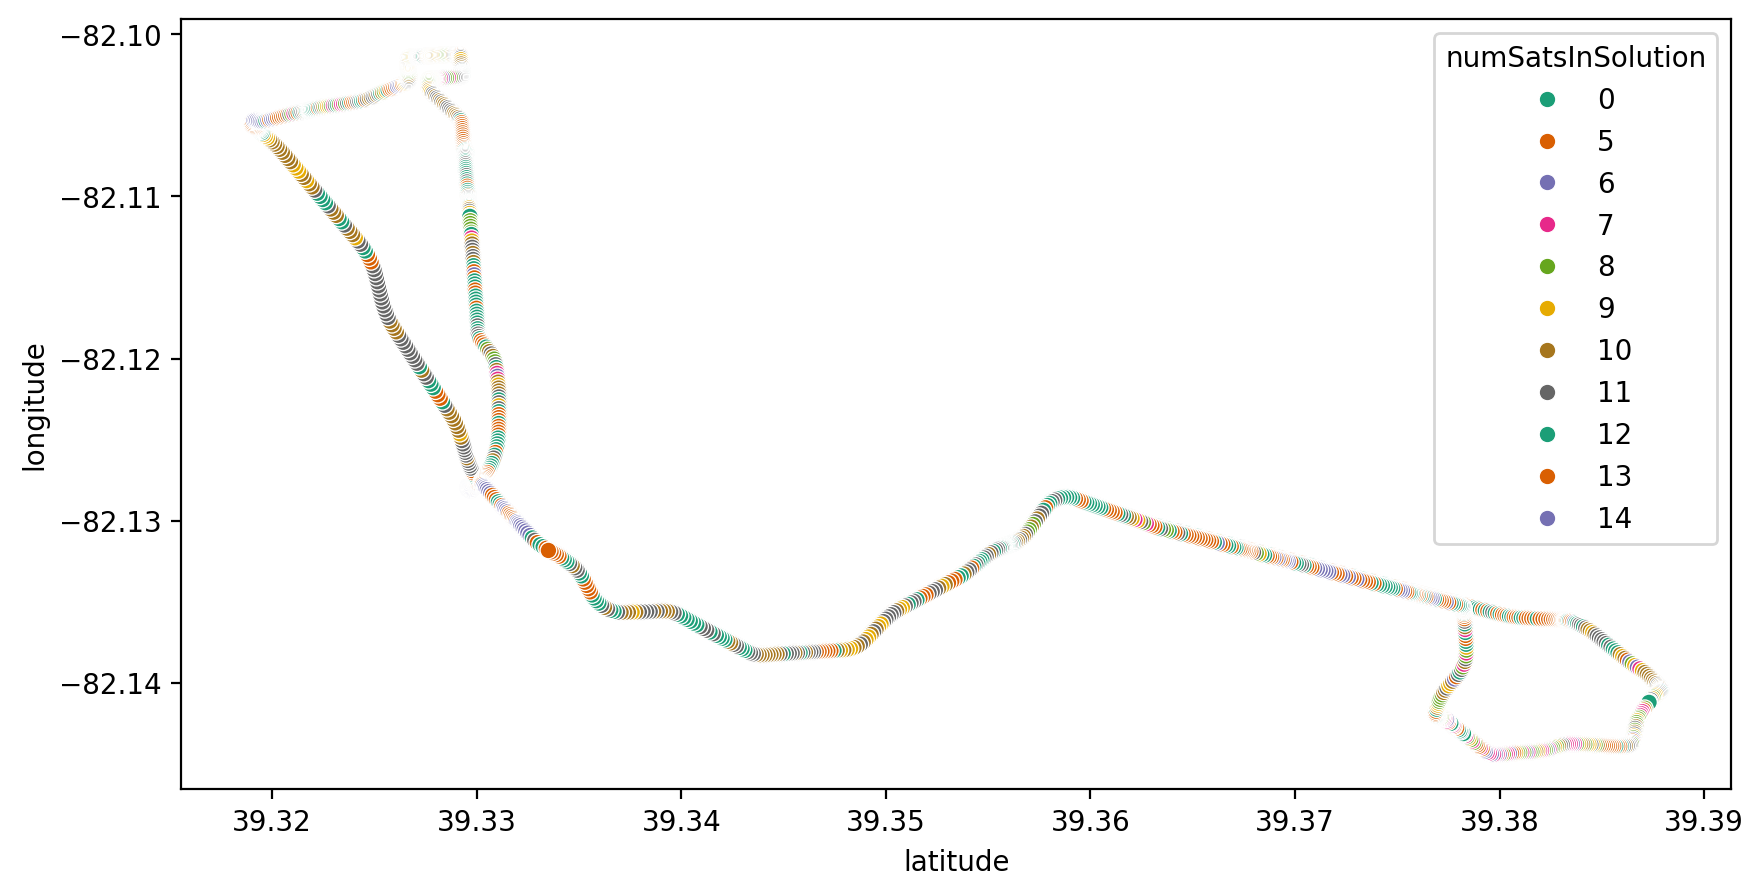

In [135]:
plt.figure(figsize=(10,5), dpi = 200)
sns.scatterplot(x = 'latitude', y = 'longitude', data = best_pose, hue = 'numSatsInSolution', palette = 'Dark2')

In [136]:
chasis.head()

,brakePercentage,groupMetadataID,drivingMode,speedMps,time,throttlePercentage,steeringPercentage,signal.turnSignal
0,0.0,0b72a836-f37e-11ee-bb4e-fb353e7798cd,COMPLETE_MANUAL,3.92,1707420476851932894,17.4,-73.104800,TURN_RIGHT
1,0.0,0b72a836-f37e-11ee-bb4e-fb353e7798cd,COMPLETE_MANUAL,3.93,1707420476883899750,17.4,-72.664055,TURN_RIGHT
2,0.0,0b72a836-f37e-11ee-bb4e-fb353e7798cd,COMPLETE_MANUAL,3.96,1707420476917887466,17.4,-72.184135,TURN_RIGHT
3,0.0,0b72a836-f37e-11ee-bb4e-fb353e7798cd,COMPLETE_MANUAL,3.99,1707420476950430948,17.4,-71.567090,TURN_RIGHT
4,0.0,0b72a836-f37e-11ee-bb4e-fb353e7798cd,COMPLETE_MANUAL,4.02,1707420476983802634,17.4,-71.087166,TURN_RIGHT


In [137]:
def CalculateVelocity(chassis_df):
    """
    Calculates the velocity based on distance and time in the chassis DataFrame.
    
    Parameters:
    chassis_df (pd.DataFrame): DataFrame containing 'distance' and 'time' columns.
    
    Returns:
    None: The function modifies the DataFrame in place by adding a 'velocity' column.
    """
    
    # Ensure the DataFrame is sorted by time
    chassis_df = chassis_df.sort_values(by='time').reset_index(drop=True)

    # Calculate the difference in distance and time between consecutive rows
    distance_diff = chassis_df['Distance'].diff()  # Change in distance
    time_diff = chassis_df['time'].diff()          # Change in time

    # Calculate velocity and add it as a new column
    chassis_df['velocity'] = distance_diff / time_diff
    
    # Replace NaN values (typically in the first row) with 0 or interpolate if needed
    chassis_df['velocity'].fillna(0, inplace=True)


In [138]:
chasis = chasis.sort_values( 'time' )

In [139]:
cfs.DeltaTime(chasis)

In [140]:
cfs.Distance(chasis)

In [141]:
def Acceleration(time_sorted_chassis_df):
    speedMps_array = np.array(time_sorted_chassis_df['speedMps']) 
    time_array = np.diff(np.array(time_sorted_chassis_df['time'])) * 1e-9 # seconds 
    time_array = np.insert(time_array, 0, time_array[0])

    acceleration_list = [] # meters/second^2
    for index in range(1, len(speedMps_array)):
        acceleration = (speedMps_array[index] - speedMps_array[index - 1]) / time_array[index]
        acceleration_list.append(acceleration)

    acceleration_list = [0] + acceleration_list # Initial acceleration is 0
    time_sorted_chassis_df['Acceleration'] = acceleration_list

In [142]:
Acceleration(chasis)

In [143]:
chasis.head()

,brakePercentage,groupMetadataID,drivingMode,speedMps,time,throttlePercentage,steeringPercentage,signal.turnSignal,DeltaTime,Distance,Acceleration
0,0.0,0b72a836-f37e-11ee-bb4e-fb353e7798cd,COMPLETE_MANUAL,3.92,1707420476851932894,17.4,-73.104800,TURN_RIGHT,31966856,0.000000,0.000000
1,0.0,0b72a836-f37e-11ee-bb4e-fb353e7798cd,COMPLETE_MANUAL,3.93,1707420476883899750,17.4,-72.664055,TURN_RIGHT,31966856,0.125310,0.312824
2,0.0,0b72a836-f37e-11ee-bb4e-fb353e7798cd,COMPLETE_MANUAL,3.96,1707420476917887466,17.4,-72.184135,TURN_RIGHT,33987716,0.250940,0.882672
3,0.0,0b72a836-f37e-11ee-bb4e-fb353e7798cd,COMPLETE_MANUAL,3.99,1707420476950430948,17.4,-71.567090,TURN_RIGHT,32543482,0.385531,0.921844
4,0.0,0b72a836-f37e-11ee-bb4e-fb353e7798cd,COMPLETE_MANUAL,4.02,1707420476983802634,17.4,-71.087166,TURN_RIGHT,33371686,0.515380,0.898966


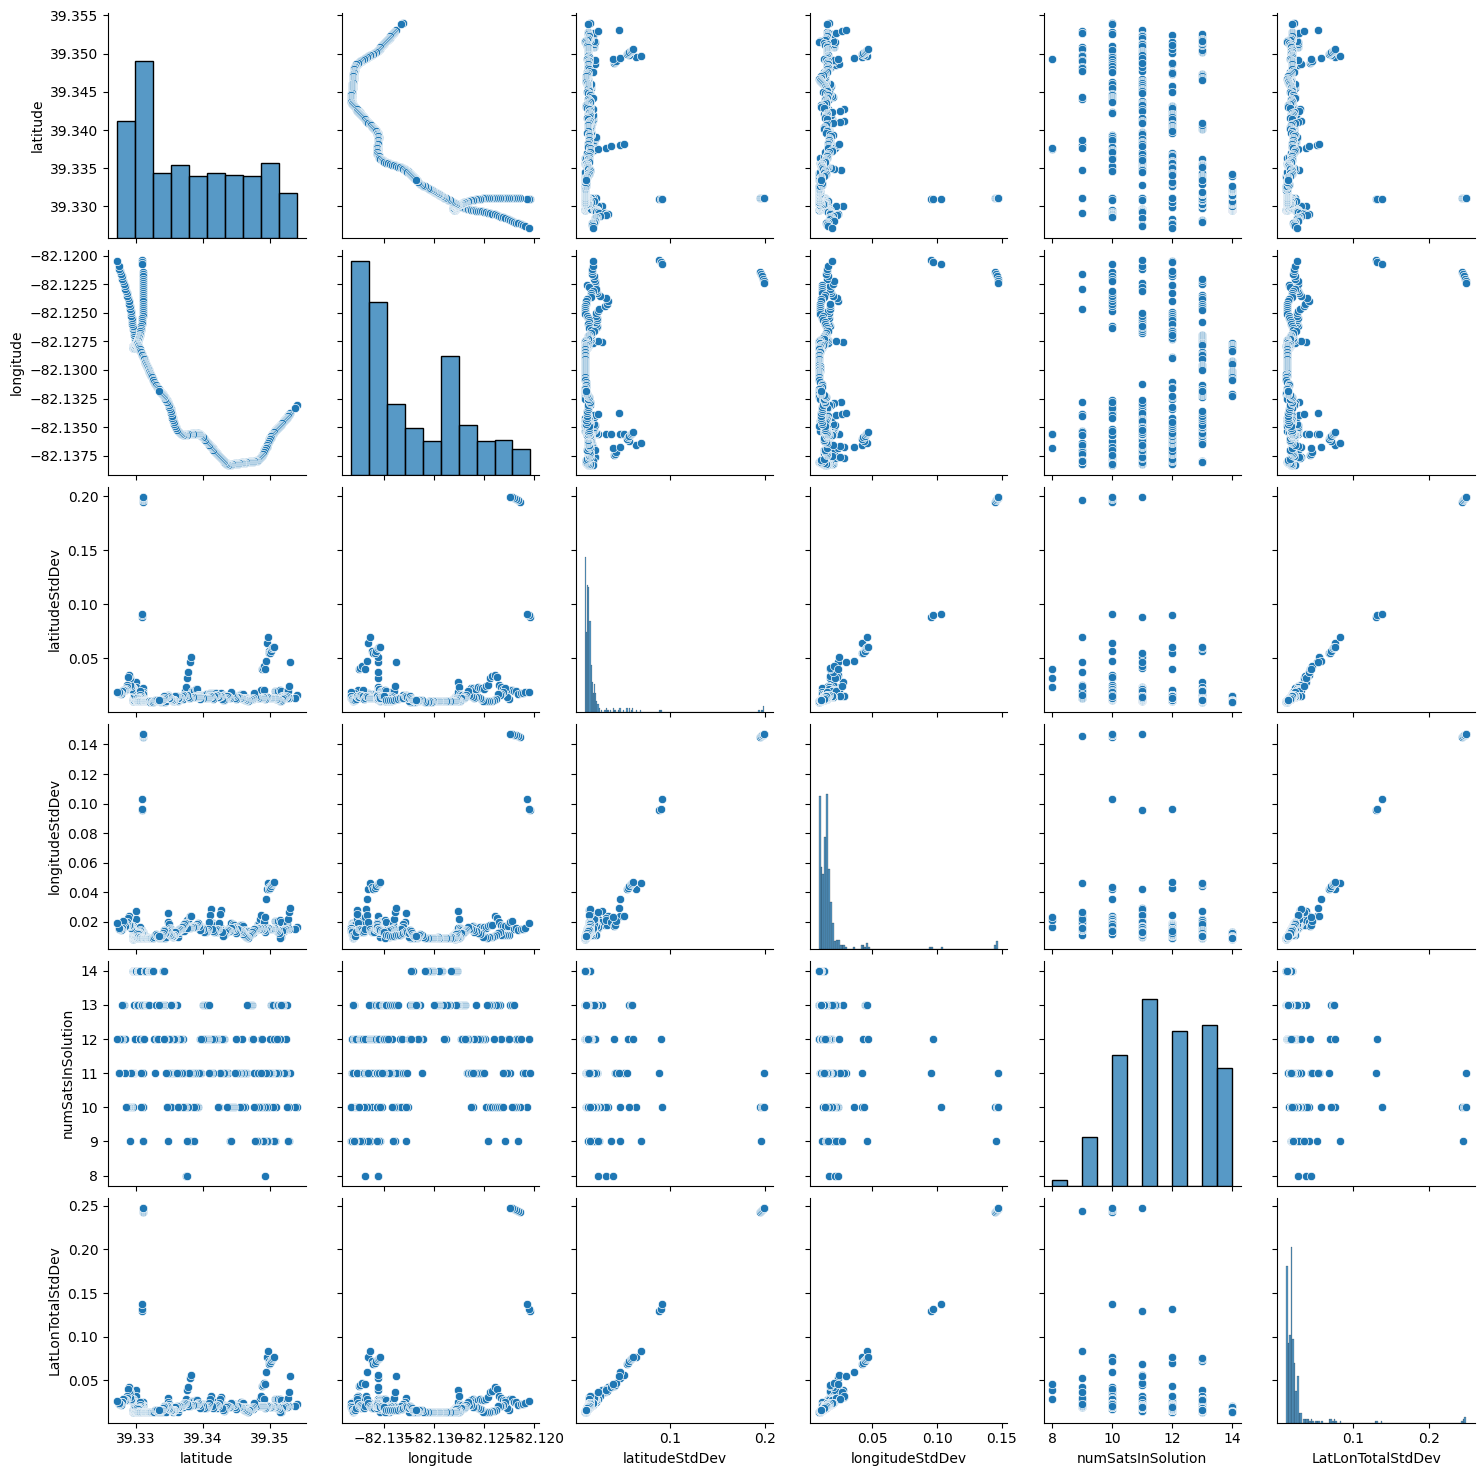

In [144]:
sns.pairplot(c2)

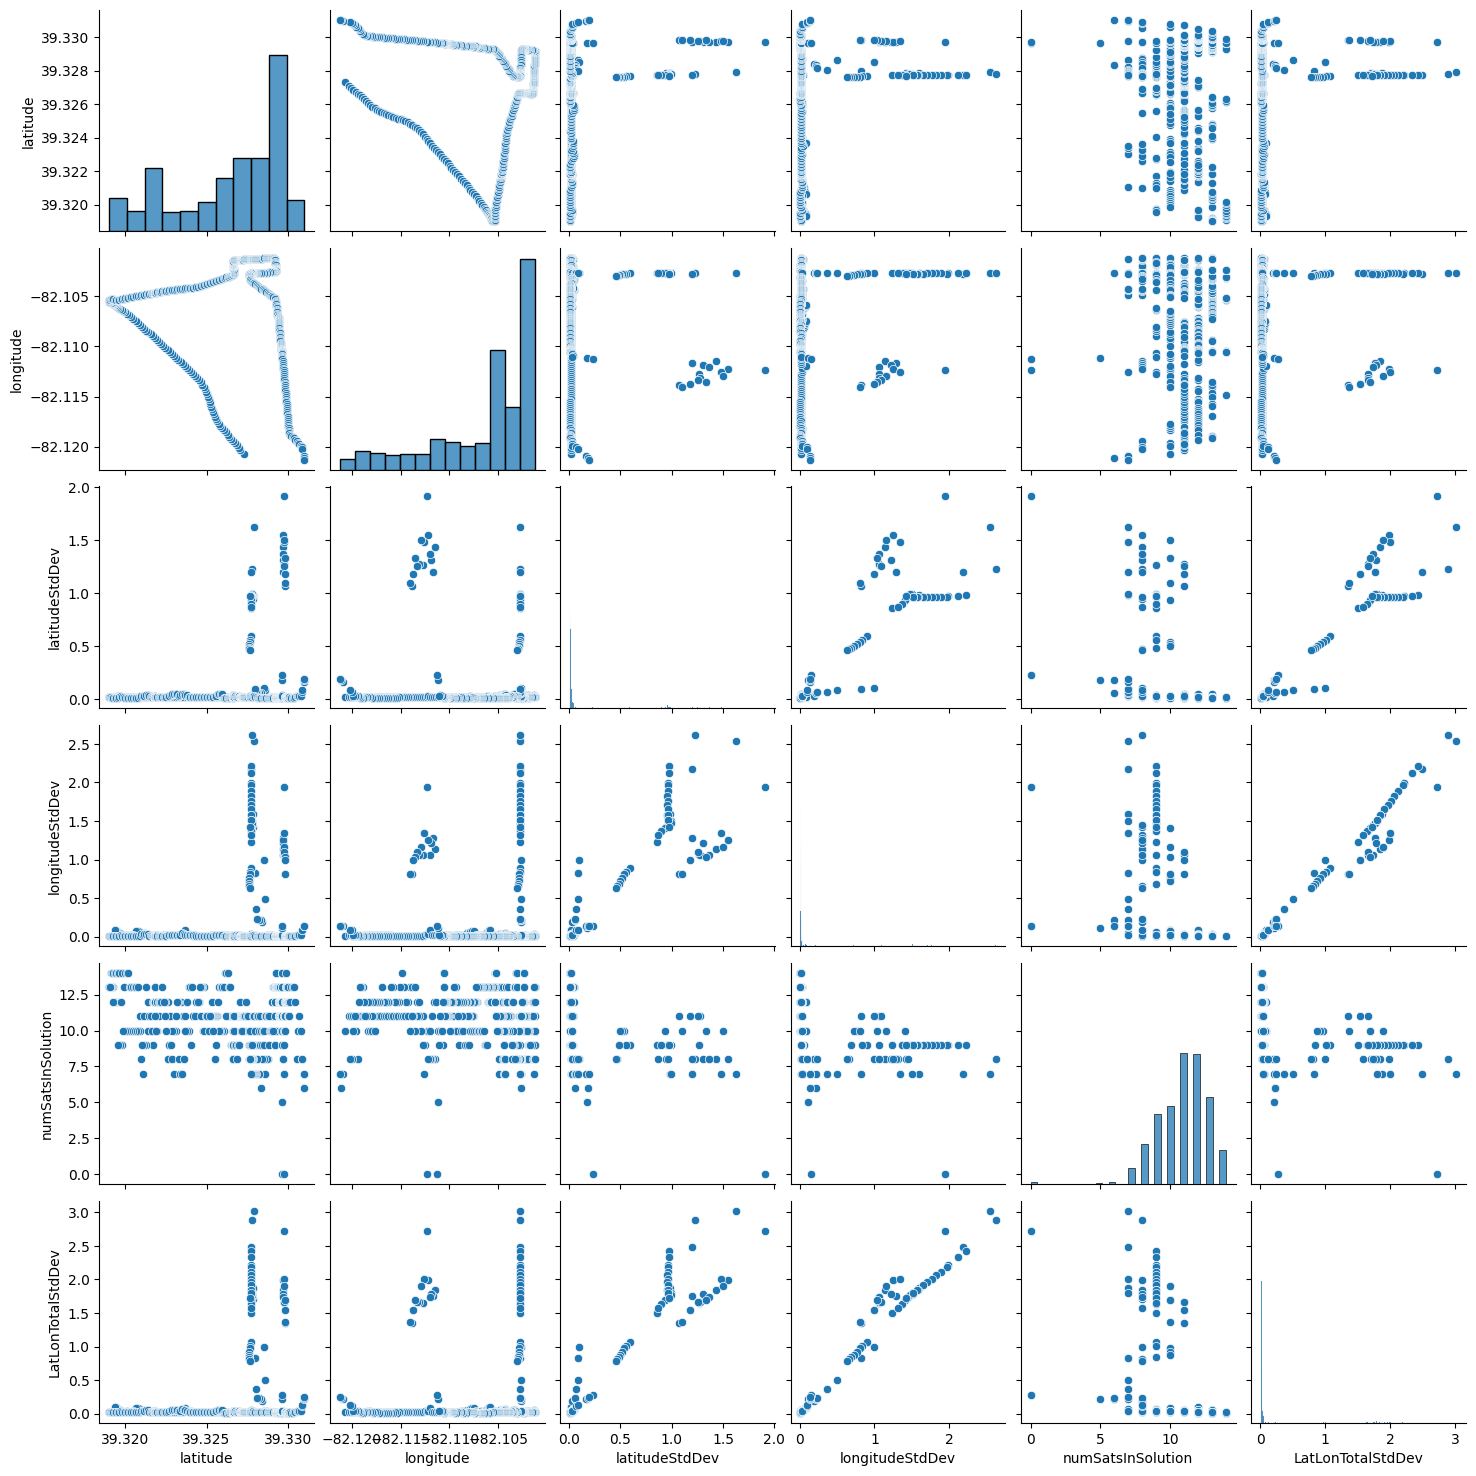

In [145]:
sns.pairplot(c1)

<Axes: >

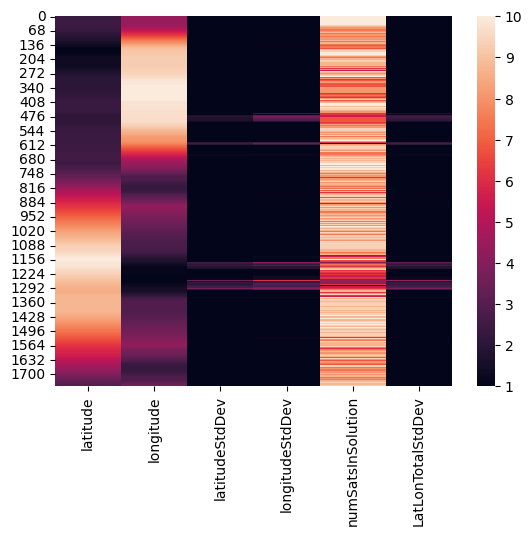

In [146]:
sns.heatmap(data)

<Axes: >

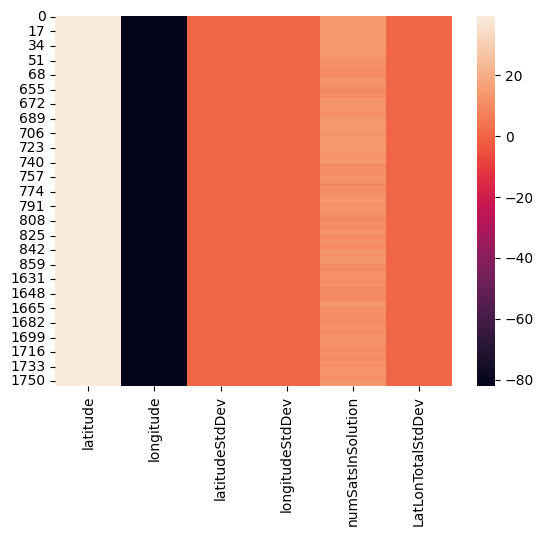

In [147]:
c2_new = c2[features].copy()
sns.heatmap(c2_new)

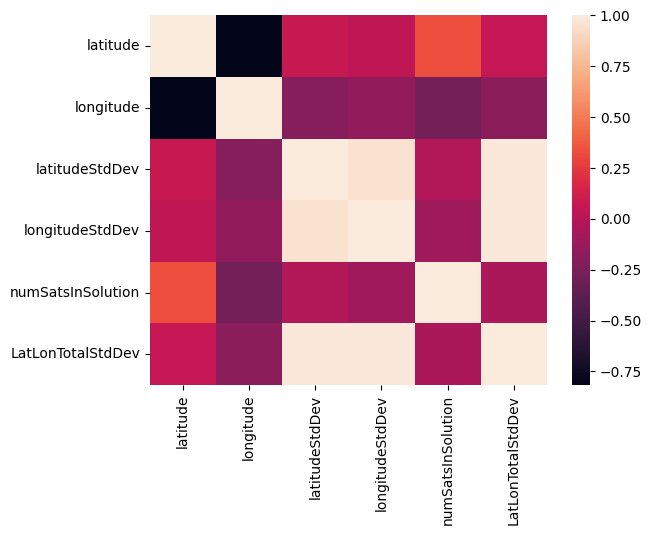

In [149]:
correlation = c0[features].corr(method = 'pearson')
ax = sns.heatmap(correlation)

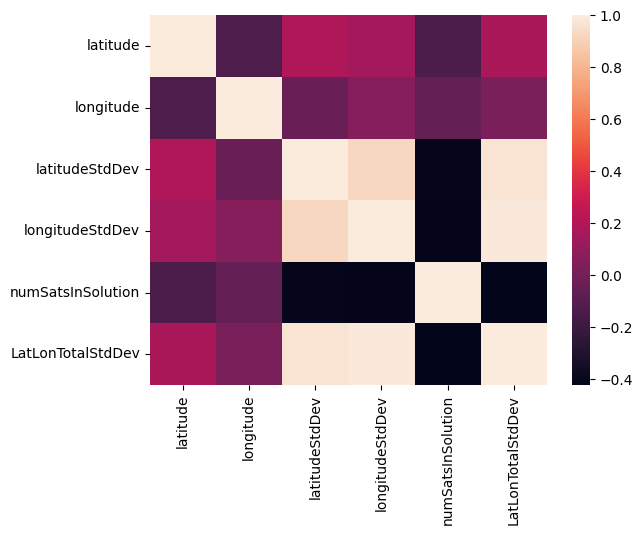

In [150]:
correlation = c1[features].corr(method = 'pearson')
ax = sns.heatmap(correlation)

<Axes: >

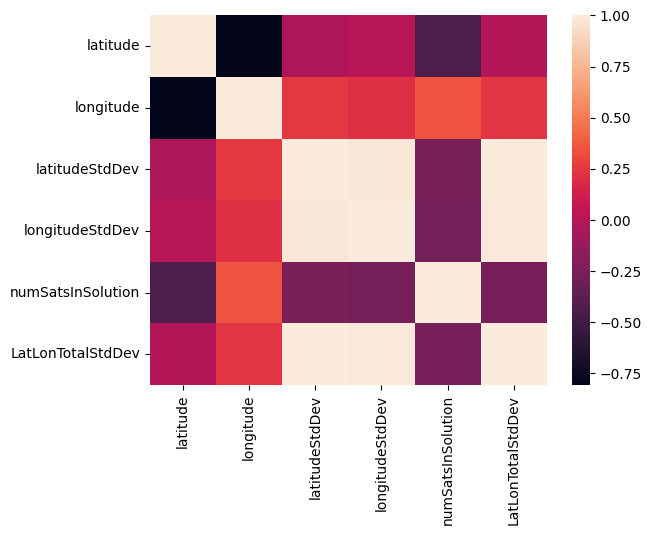

In [151]:
correlation = c2[features].corr(method = 'pearson')
sns.heatmap(correlation)

In [152]:
c3= best_pose[labels == 3][["groupMetadataID"] + features]

/home/jle_linux/do-env/lib/python3.10/site-packages/seaborn/matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
/home/jle_linux/do-env/lib/python3.10/site-packages/seaborn/matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


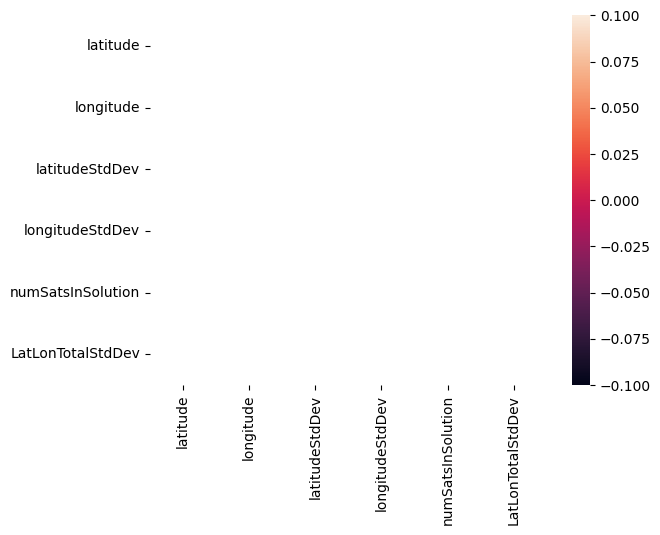

In [153]:
correlation = c3[features].corr(method = 'pearson')
ax = sns.heatmap(correlation)